# THE SPARKS FOUNDATION
# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP
# GRIP FEBURARY2022
# TASK 6 - PREDICTION USING DECISION TREE ALGORITHM

# AUTHOR: PRATHIBAN V

# We will develop a classification model trained on the popular iris dataset using the decision tree algorithm.

# IRIS DATASET: The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species

In [61]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.metrics import multilabel_confusion_matrix, classification_report

In [62]:
# Loading the iris dataset
iris=datasets.load_iris()

In [35]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [36]:
#Reading the Data
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Exploratory Data Analysis

In [37]:
#Checking the dimensions of the data
df.shape

(150, 4)

In [38]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
#Storing the target data( which consists of 3 different types of the iris plant) in a variable 'y'
y = iris.target 
y.shape

(150,)

In [40]:
#checking for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [41]:
#Checking the correlation between features in the dataset
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Data Visualizations

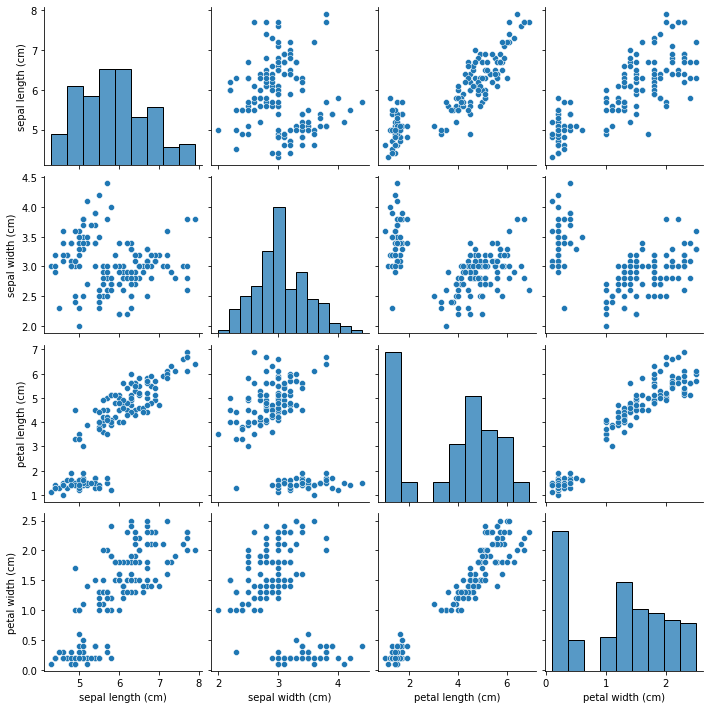

In [42]:
#Showing a quick view of relationships amaong features in the dataset
sns.pairplot(df)

<AxesSubplot:>

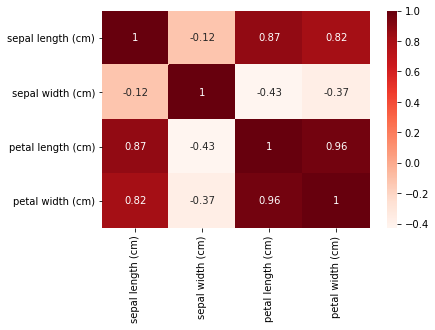

In [43]:
sns.heatmap(df.corr(),annot=True, cmap = 'Reds')

Data Preprocessing

In [44]:
#Importing necessary libraries for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
y = iris.target

In [46]:
#Splitting the data into training,testing and validation sets
X_trainv,X_test,y_trainv,y_test = train_test_split(df,y, train_size=0.75, random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_trainv,y_trainv, train_size=0.7, random_state=1)

In [47]:
#Creating copies of the train, test and validation sets before standardizing
X_train1 = X_train.copy()
X_val1 = X_val.copy()
X_test1= X_test.copy()

In [48]:
#Getting the dimensions of each dataset
print(X_train.shape, X_val.shape, X_test.shape)

(78, 4) (34, 4) (38, 4)


In [49]:
#Standardizing the first data sets
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_val1 = scaler.transform(X_val1)
X_test1 = scaler.transform(X_test1)

In [50]:
#Getting the dimensions of each dataset after standardizing
print(X_train1.shape, X_val1.shape, X_test1.shape)

(78, 4) (34, 4) (38, 4)


Model Construction

In [51]:
#Importing the required library
from sklearn.tree import DecisionTreeClassifier

In [52]:
#instantiating the classifier with no hyperparameter tuned and training the first model on standardized data
tree1 = DecisionTreeClassifier()
model1 =tree1.fit(X_train1,y_train)

In [53]:
#Getting the accuracy of the model on training, testing and validation sets
print(model1.score(X_train1,y_train))
print(model1.score(X_val1,y_val))
print(model1.score(X_test1,y_test))

1.0
0.8823529411764706
1.0


In [54]:
#Using model1 to make predictions on new data and printing the classification report
y_pred1 = model1.predict(X_test1)
print(classification_report(
    y_test,
    y_pred1,
    output_dict=False,
    target_names=['setosa', 'versicolor','virginica']
))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [55]:
#instantiating the classifier with no hyperparameter tuned and training the second model on unstandardized data
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
model= tree.fit(X_train,y_train)
#Getting the accuracy of the model on training, testing and validation sets
print(model.score(X_train,y_train))
print(model.score(X_val,y_val))
print(model.score(X_test,y_test))

1.0
0.8823529411764706
0.9736842105263158


In [56]:
#Using model trained on unstandardized data to make predictions on new data and printing the classification report
y_pred = model.predict(X_test)
print(classification_report(
    y_test,
    y_pred,
    output_dict=False,
    target_names=['setosa', 'versicolor','virginica']
))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



([<matplotlib.axis.YTick at 0x13a66868>,
 [Text(0, 0, 'sepal length (cm)'),
  Text(0, 1, 'sepal width (cm)'),
  Text(0, 2, 'petal length (cm)'),
  Text(0, 3, 'petal width (cm)')])

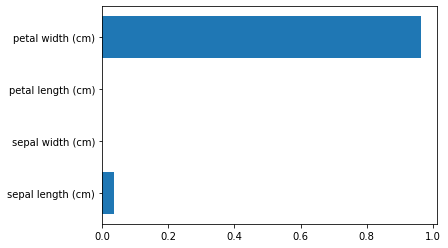

In [57]:
#Checking the most relevant features used in the second model
cols=list(df.columns)
plt.barh(range(4),model.feature_importances_,align='center')
plt.yticks(np.arange(4),labels=cols)

([<matplotlib.axis.YTick at 0x13b296a0>,
 [Text(0, 0, 'sepal length (cm)'),
  Text(0, 1, 'sepal width (cm)'),
  Text(0, 2, 'petal length (cm)'),
  Text(0, 3, 'petal width (cm)')])

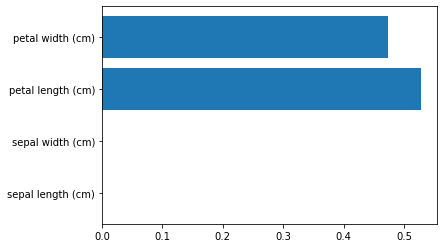

In [58]:
#Checking the most relevant features used in the first model
cols=list(df.columns)
plt.barh(range(4),model1.feature_importances_,align='center')
plt.yticks(np.arange(4),labels=cols)

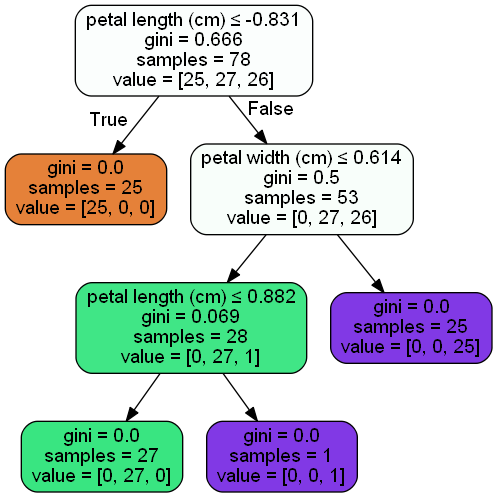

In [59]:
# Import necessary libraries for visualizing first tree model
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

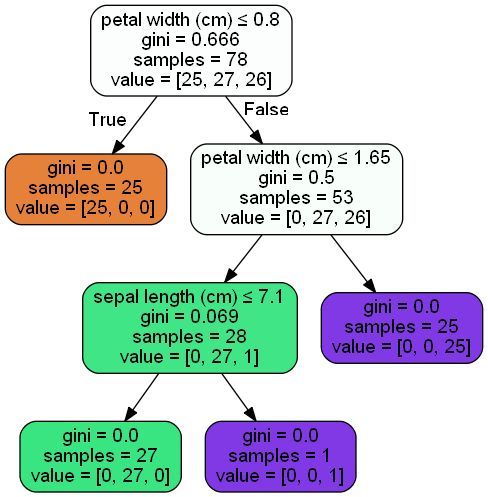

In [60]:
# Visualizing the second tree model
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Thus we successfully created Decision Tree classifier